In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

%matplotlib inline

#Tenemos los datos de las temperaturas y las magnetizaciones espontaneas del Gadolinio
temp =np.array([0.030717,0.061433, 0.095563, 0.12628, 0.153584, 0.191126, 0.262799, 0.334471,0.416382,0.505119,0.583618,0.761092,0.860068,0.938567,0.969283,0.986348,0.996587,1.006826])
magn =np.array([1, 0.99962, 0.997342, 0.992141, 0.983143, 0.976689, 0.945822, 0.921371,0.884088,0.836554,0.790311,0.651695,0.560614,0.406811,0.329929,0.213372,0.158282,0.095524])

X_train=temp.reshape(-1,1)

#Cargamos los datos test con los que los compararemos
df_test = pd.read_csv("curvasj.csv")




slope: -0.8280641676574817
y-intercept: 1.1348683350594702
so...
 f(x) = -0.8280641676574817x + 1.1348683350594702


array([[0.001],
       [0.002],
       [0.003],
       [0.004],
       [0.005],
       [0.006],
       [0.007],
       [0.008],
       [0.009],
       [0.01 ],
       [0.011],
       [0.012],
       [0.013],
       [0.014],
       [0.015],
       [0.016],
       [0.017],
       [0.018],
       [0.019],
       [0.02 ],
       [0.021],
       [0.022],
       [0.023],
       [0.024],
       [0.025],
       [0.026],
       [0.027],
       [0.028],
       [0.029],
       [0.03 ],
       [0.031],
       [0.032],
       [0.033],
       [0.034],
       [0.035],
       [0.036],
       [0.037],
       [0.038],
       [0.039],
       [0.04 ],
       [0.041],
       [0.042],
       [0.043],
       [0.044],
       [0.045],
       [0.046],
       [0.047],
       [0.048],
       [0.049],
       [0.05 ],
       [0.051],
       [0.052],
       [0.053],
       [0.054],
       [0.055],
       [0.056],
       [0.057],
       [0.058],
       [0.059],
       [0.06 ],
       [0.061],
       [0.062],
       [

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

Magnetizaciones predichas:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1

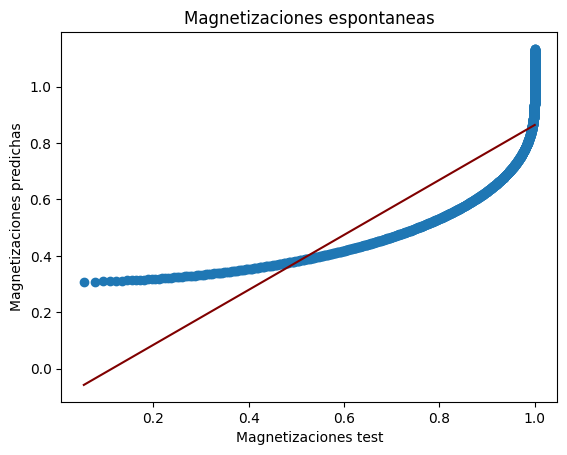

MSE: 0.03389663448711758
RMSE: 0.18411038668993548
R2: 0.20601571469628266


In [12]:
#Veamos primero una regresion lineal con el momento test J=1/2
#Sabemos que la relaciñon entre T/Tc y M/Mc no es lineal por lo que no dará buenos resultados
#Aún así, apliquemos el modelo
m, b, r, p, se = stats.linregress(temp, magn)

print('slope: {}\ny-intercept: {}'.format(m, b))
print('so...\n f(x) = {}x + {}'.format(m, b))

#Hagamos las matrices para los datos test:
X_test = np.array(df_test['T'])
y_test1 = np.array(df_test['J=1/2'])
X_test=X_test.reshape(-1,1)
y_train = magn
model = LinearRegression().fit(X_train, y_train)

display(X_test,y_test1)

#Comparamos las predicciones
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Magnetizaciones predichas: ',np.round(predictions)[:800])
print('Magnetizaciones test: ',y_test1[:800])

plt.scatter(y_test1, predictions)
plt.xlabel('Magnetizaciones test')
plt.ylabel('Magnetizaciones predichas')
plt.title('Magnetizaciones espontaneas')
# overlay the regression line
z = np.polyfit(y_test1, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test1,p(y_test1), color='maroon')
plt.show()

#Veamos las métricas del modelo
mse = mean_squared_error(y_test1, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test1, predictions)
print("R2:", r2)


Lasso() 



,T
0,0.001
1,0.002
2,0.003
3,0.004
4,0.005
...,...
994,0.995
995,0.996
996,0.997
997,0.998


0      1.000000
1      1.000000
2      1.000000
3      1.000000
4      1.000000
         ...   
994    0.115249
995    0.103138
996    0.089434
997    0.073001
998    0.051958
Name: J=1, Length: 999, dtype: float64

,T
0,0.030717
1,0.061433
2,0.095563
3,0.126280
4,0.153584
5,0.191126
6,0.262799
7,0.334471
8,0.416382
9,0.505119


0     1.000000
1     0.999620
2     0.997342
3     0.992141
4     0.983143
5     0.976689
6     0.945822
7     0.921371
8     0.884088
9     0.836554
10    0.790311
11    0.651695
12    0.560614
13    0.406811
14    0.329929
15    0.213372
16    0.158282
17    0.095524
Name: m, dtype: float64

MSE: 0.06182344641782626
RMSE: 0.24864321108332368
R2: -0.36371474172127205


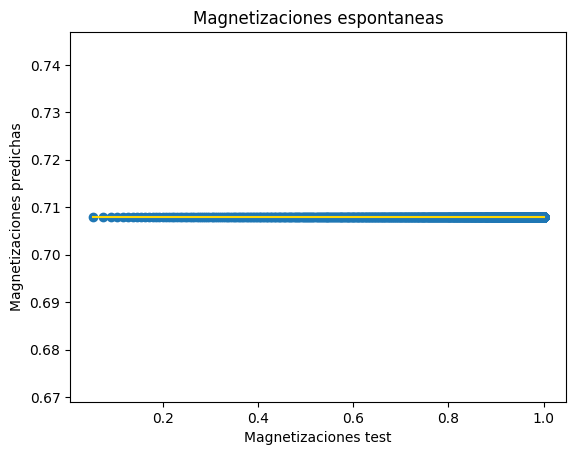

In [13]:
#Veamos otro tipo de regresión lineal para el J=1: modelo Lasso
#Ahora lo intentaremos con Dataframe

from sklearn.linear_model import Lasso
X_test2 = df_test[['T']]
y_test2 = df_test['J=1']

data_train={'T':[0.030717,0.061433, 0.095563, 0.12628, 0.153584, 0.191126, 0.262799, 0.334471,0.416382,0.505119,0.583618,0.761092,0.860068,0.938567,0.969283,0.986348,0.996587,1.006826], 'm':[1, 0.99962, 0.997342, 0.992141, 0.983143, 0.976689, 0.945822, 0.921371,0.884088,0.836554,0.790311,0.651695,0.560614,0.406811,0.329929,0.213372,0.158282,0.095524]}
df_data_train=pd.DataFrame(data_train)
X_train2=df_data_train[['T']]
y_train2=df_data_train['m']

model = Lasso().fit(X_train2, y_train2)
print (model, "\n")

display(X_test2, y_test2, X_train2, y_train2)
predictions = model.predict(X_test2)
mse = mean_squared_error(y_test2, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test2, predictions)
print("R2:", r2)

#Comparamos las predicciones con los valores test
plt.scatter(y_test2, predictions)
plt.xlabel('Magnetizaciones test')
plt.ylabel('Magnetizaciones predichas')
plt.title('Magnetizaciones espontaneas')
# overlay the regression line
z = np.polyfit(y_test2, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test2,p(y_test2), color='gold')
plt.show()
#Al ser un modelo lineal aplicado a variables que no siguen una relacion lineal, no da buenos resultados tampoco
